In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from numpy import argmax
from sys import exit

In [3]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from statsmodels.tools.eval_measures import rmse
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.lof import LOF

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFECV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [5]:
df = pd.read_csv('C:/Users/didu/Documents/data_science_presenattion/data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#chekcking null values
print('The sum of all Null values is =',df.isnull().sum().sum())

The sum of all Null values is = 0


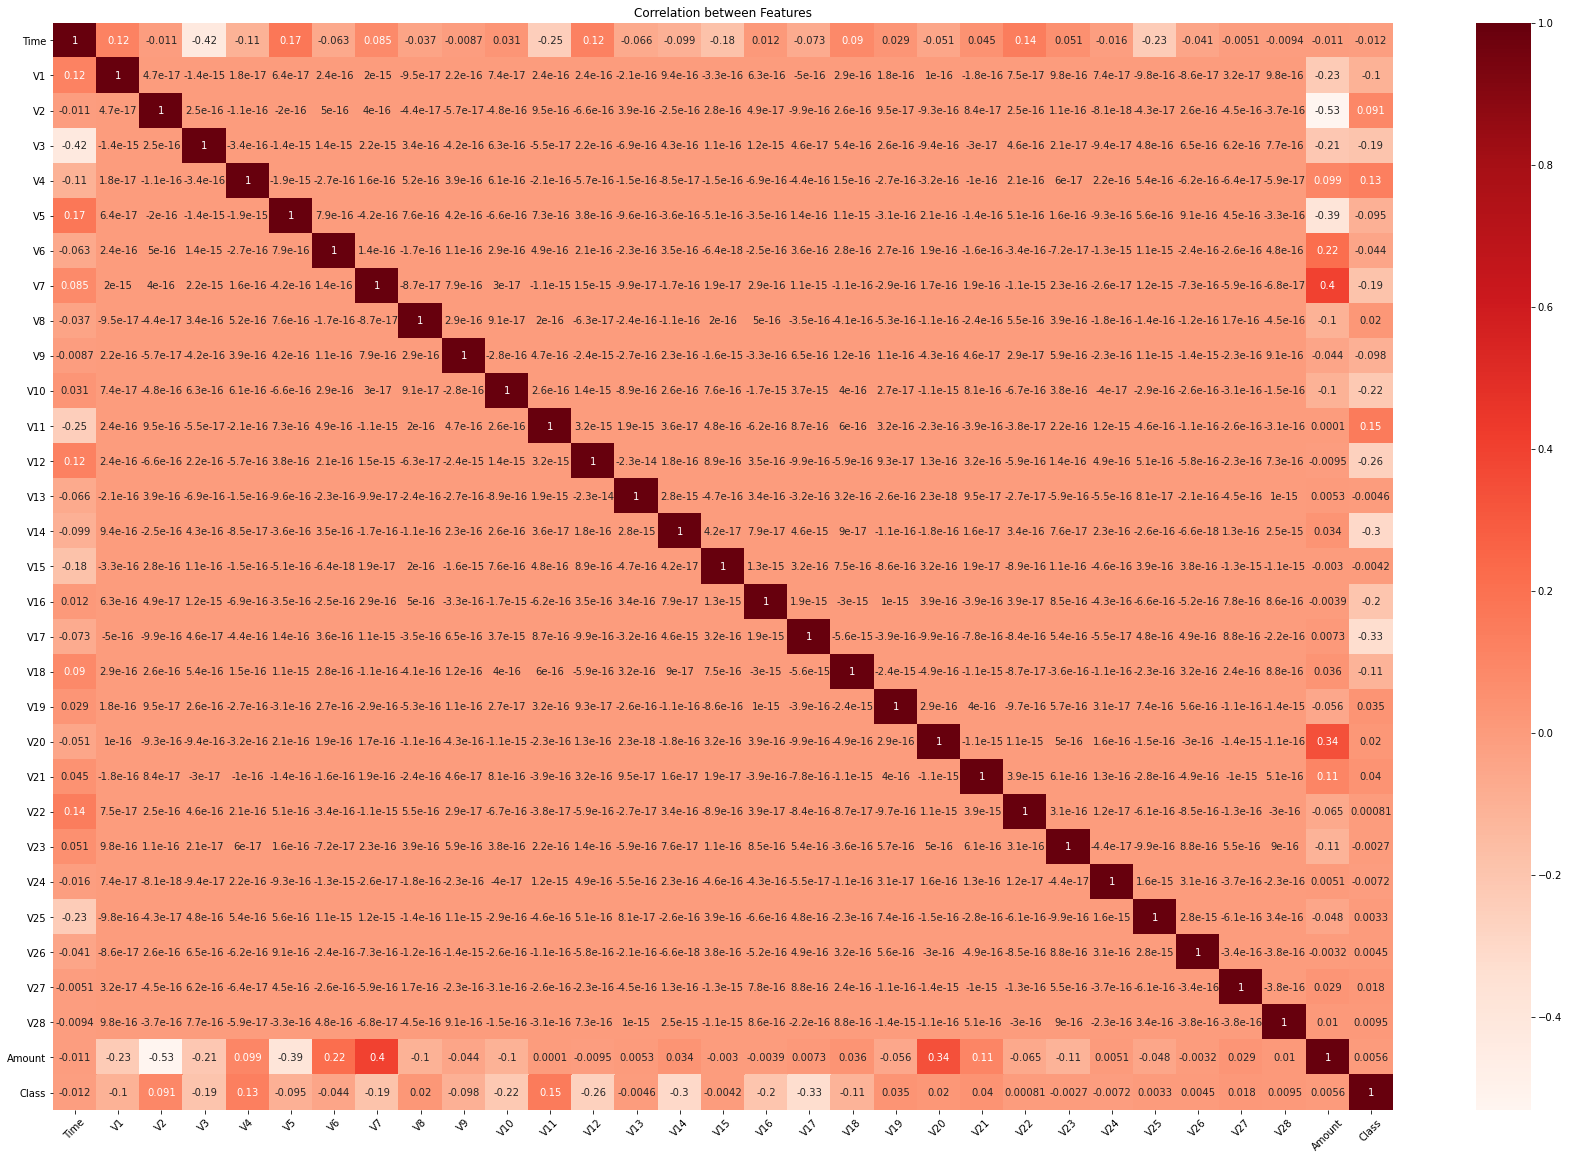

In [7]:
#checking correlation among the variables
plt.figure(figsize=(30,20))
plt.xticks(rotation=45)
plt.title('Correlation between Features')
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [8]:
#outlier detection
outlier_investigation = df.describe()

#outlier_columns = ["Time", "Amount"]
outlier_columns = df.columns
# Boxplot approach

for column in outlier_columns:
    
    lower_quartile = df[column].quantile(0.25)
    upper_quartile = df[column].quantile(0.75)
    iqr            = upper_quartile - lower_quartile
    iqr_extended   = iqr * 2
    min_border     = lower_quartile - iqr_extended
    max_border     = upper_quartile + iqr_extended
    
    outliers = df[(df[column] < min_border) | (df[column] > max_border) ].index
    print(f"{len(outliers)} outliers detected in column {column}")
    
    #df_cc.drop(outliers, inplace = True)

0 outliers detected in column Time
4432 outliers detected in column V1
8960 outliers detected in column V2
1816 outliers detected in column V3
4736 outliers detected in column V4
6037 outliers detected in column V5
19016 outliers detected in column V6
5809 outliers detected in column V7
17311 outliers detected in column V8
2969 outliers detected in column V9
5766 outliers detected in column V10
334 outliers detected in column V11
8259 outliers detected in column V12
401 outliers detected in column V13
7069 outliers detected in column V14
565 outliers detected in column V15
2865 outliers detected in column V16
3957 outliers detected in column V17
1752 outliers detected in column V18
4466 outliers detected in column V19
20808 outliers detected in column V20
11156 outliers detected in column V21
614 outliers detected in column V22
13267 outliers detected in column V23
446 outliers detected in column V24
2219 outliers detected in column V25
1247 outliers detected in column V26
27710 outlie

In [9]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
#Create independent and Dependent Features
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)

X = df[columns]
Y = df[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [12]:
Fraud = df[df['Class']==1]
Valid = df[df['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

0.0017304750013189597


In [13]:
#outlier_fraction = 492/284315
classifiers = {
    "Isolation Forest":IForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LOF(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Logistic Regression":LogisticRegression(random_state=0, penalty='l1', solver='liblinear')
   
}

In [14]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit(X)
        pred_proba = clf.predict_proba(X)[:, 1]
        y_pred = clf.predict(X)
    elif clf_name == "Logistic Regression":
        clf.fit(X,Y)
        pred_proba = clf.predict_proba(X)[:, 1]
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        pred_proba = clf.predict_proba(X)[:, 1]
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    #y_pred[y_pred == 1] = 0
    #y_pred[y_pred == -1] = 1
    #n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: ".format(clf_name))
    roc_score = roc_auc_score(Y, pred_proba)
    print('ROC_AUC score is:%f' % roc_score)
    precision, recall, thresholds_pr = precision_recall_curve(Y, pred_proba)
    fscore = (2 * precision * recall) / (precision + recall)
    ix = argmax(fscore)
    pr_auc_score = auc(recall, precision)
    print('PR_AUC score is:%f' % pr_auc_score)
    print(confusion_matrix(Y,y_pred))
    print('--------------------------------------------------------------------------')


Isolation Forest: 
ROC_AUC score is:0.951278
PR_AUC score is:0.205211


C:\Users\didu\.conda\envs\data_science\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


[[283966    349]
 [   348    144]]
--------------------------------------------------------------------------
Local Outlier Factor: 
ROC_AUC score is:0.782754
PR_AUC score is:0.016587


C:\Users\didu\.conda\envs\data_science\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


[[283934    381]
 [   468     24]]
--------------------------------------------------------------------------
Logistic Regression: 
ROC_AUC score is:0.979052
PR_AUC score is:0.767528
[[284274     41]
 [   185    307]]
--------------------------------------------------------------------------
